In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import matplotlib
# %matplotlib notebook

In [69]:
directory = "./Trap14"
for n in range(1000):
    im = Image.open(f"{directory}/image_{n:05d}.png")
#     plt.imshow(im)
#     plt.xlim(140, 220)
#     plt.ylim(160,240)
#     plt.show()
    im.crop((100,125,250,275)).save(f"{directory}_prossessed/image_{n:05d}.png")

In [20]:
import cv2
images = []#list of cv2 image obj
video = cv2.VideoWriter("test.AVI", cv2.VideoWriter_fourcc(*'XVID'), 24, (1200,800))
for n in range(1000):
    im = Image.open(f"{directory}/image_{n:05d}.png")
    video.write(np.asarray(im))


In [79]:
df = pd.read_csv('data_12xy.csv')
df.columns

Index(['# x', 'y', 'error'], dtype='object')

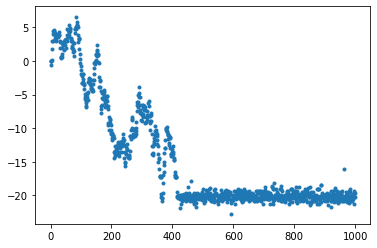

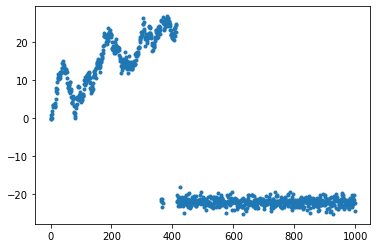

In [80]:
xlin = np.arange(0,1000)
plt.errorbar(xlin, df['# x'],yerr=df['error'], fmt='.')
plt.show()
plt.errorbar(xlin, df['y'],yerr=df['error'], fmt='.')
plt.show()